# Bank Customer Churn Prediction
It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave bank or not.

# Load the Required Modules

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

# modelling lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

# Algorithms
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb


#Metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score

# Load the Dataset

In [7]:
df=pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [117]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [118]:
# find number of numeric columns 
df.select_dtypes(include=['int64','float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [46]:
#Find a categorical columns
df.select_dtypes(include=['object']).columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [8]:
df.drop(['RowNumber','CustomerId','Surname'], axis = 1,inplace=True)

<Axes: >

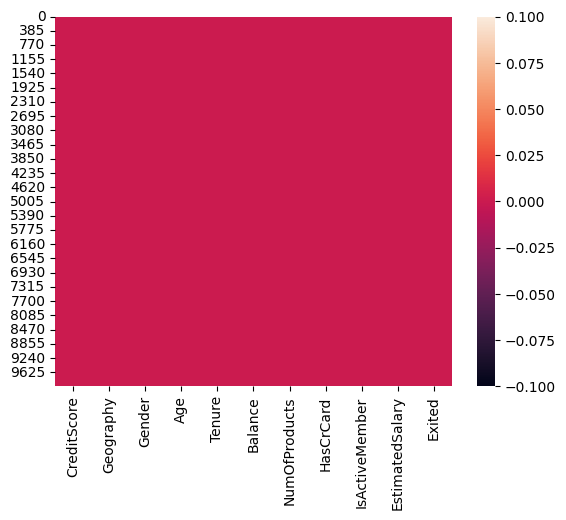

In [120]:
# find a null value
sns.heatmap(df.isnull())

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [113]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [15]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

# Exploratory Data Analysis

Text(0.5, 1.0, 'Number of Exited value in Geography')

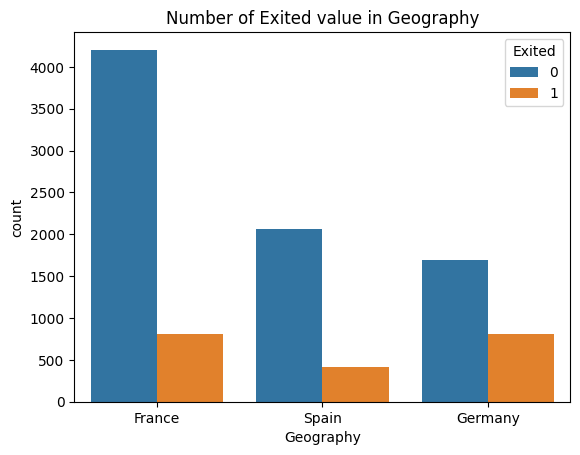

In [65]:
sns.countplot(df, x="Geography", hue="Exited")
plt.title('Number of Exited value in Geography')

Text(0.5, 1.0, 'Number of Exited value in IsActiveMember')

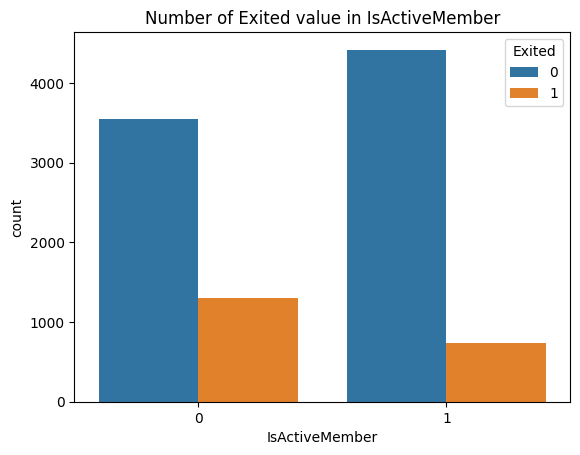

In [68]:

sns.countplot(df, x="IsActiveMember", hue="Exited")
plt.title('Number of Exited value in IsActiveMember')

Text(0.5, 1.0, 'Number of Exited value in NumOfProducts')

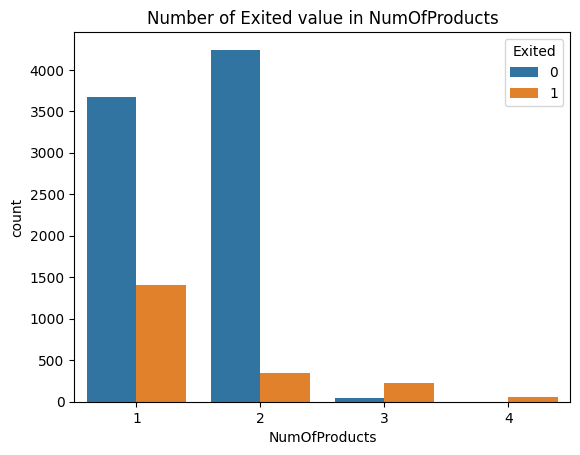

In [66]:
sns.countplot(df, x="NumOfProducts", hue="Exited")
plt.title('Number of Exited value in NumOfProducts')

Text(0.5, 1.0, 'Number of Exited value in Tenure columns')

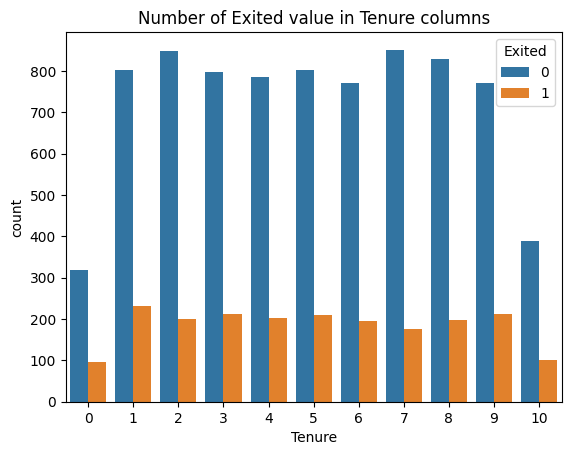

In [64]:
sns.countplot(df, x="Tenure", hue="Exited")
plt.title('Number of Exited value in Tenure columns')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


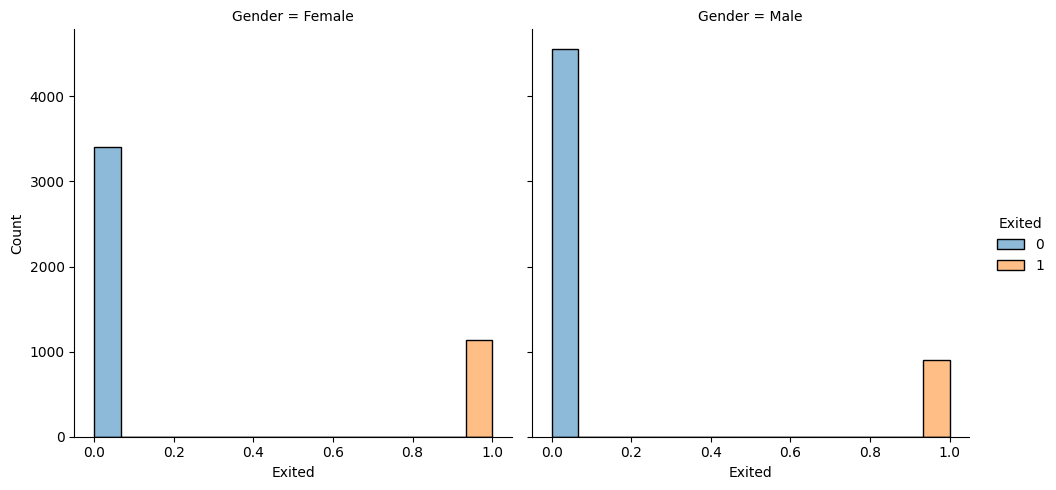

In [55]:
sns.displot(data=df, x="Exited", col="Gender", kde=True, hue="Exited")

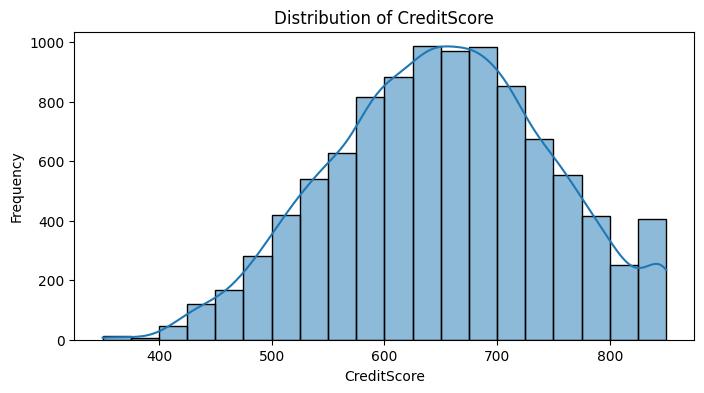

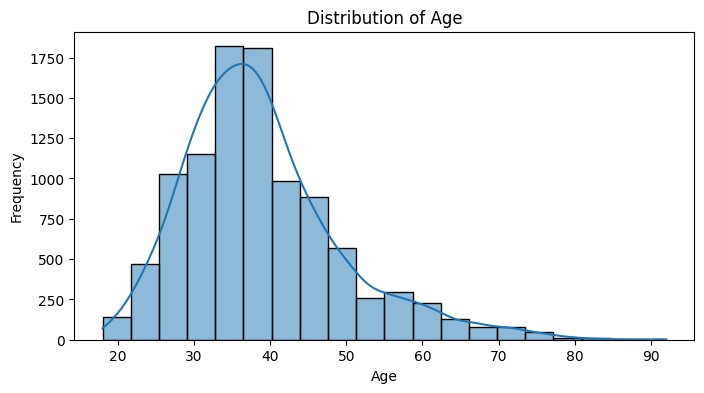

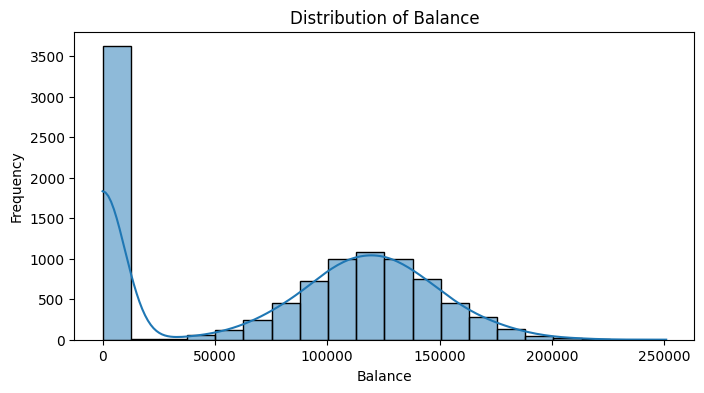

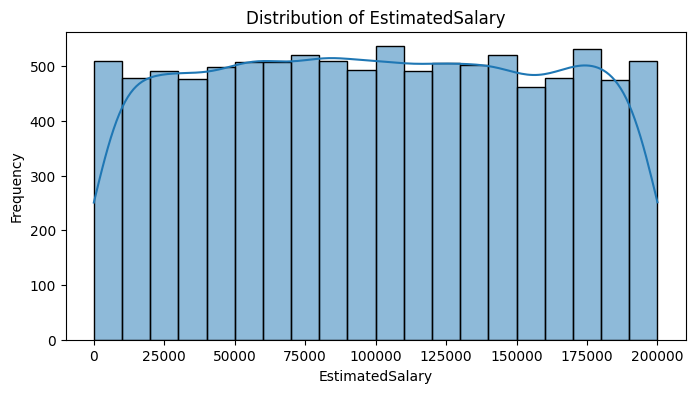

In [70]:
import matplotlib.pyplot as plt
col_dis = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
for col in col_dis:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins = 20, kde = True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show() 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


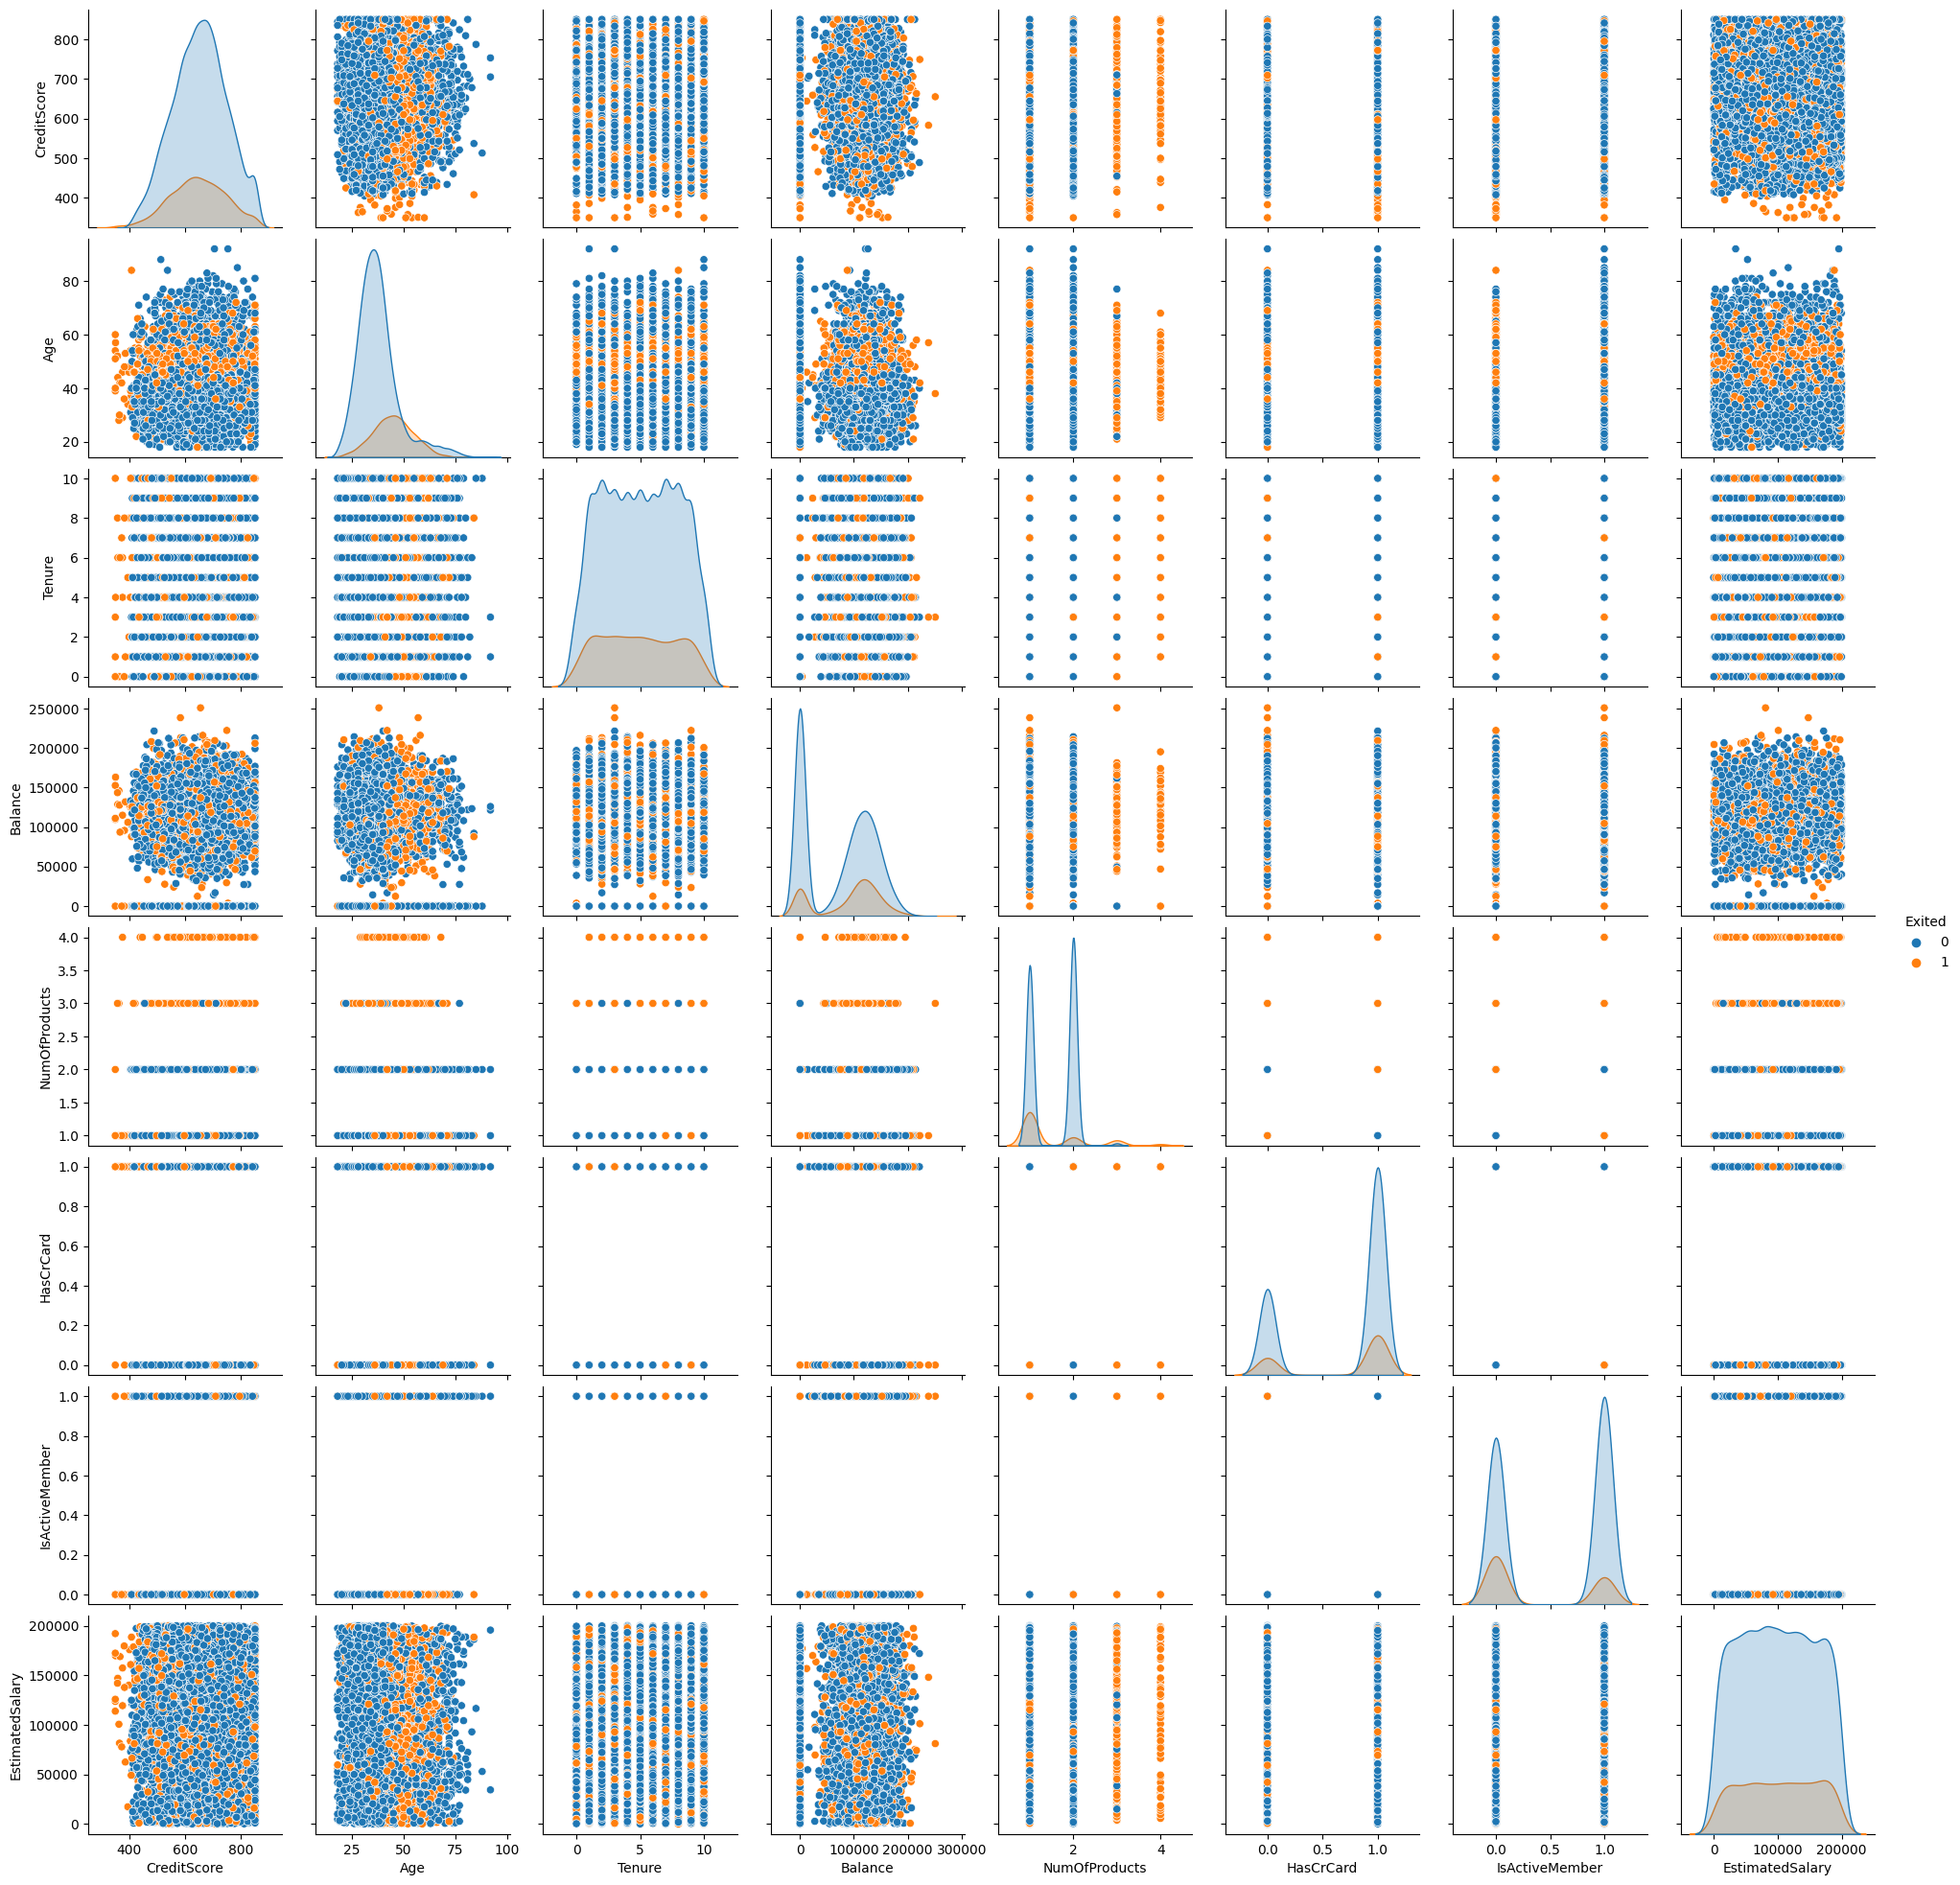

In [122]:

sns.pairplot(data=df, hue="Exited")

# transforming categorical variable to numerica

In [9]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
#= France=0
# germany=1
# Spain=2

In [10]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Gender']
#female=0
#male=1

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

# Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods

In [11]:
x = df.drop(['Exited'], axis = 1)
y = df['Exited']


# Find Correlation 

In [126]:
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

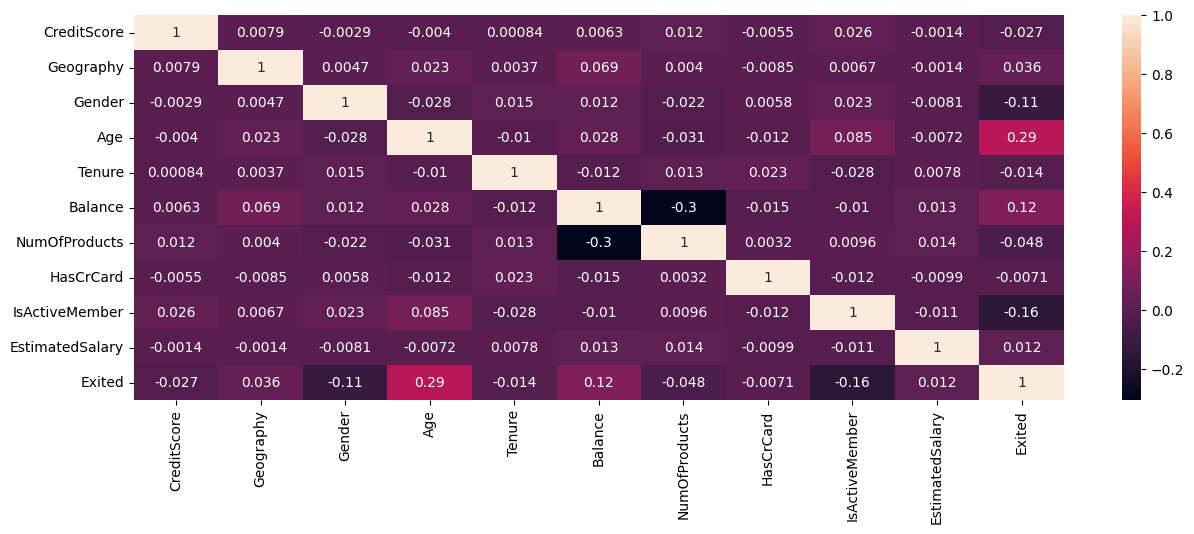

In [127]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

In [128]:
df_corr_exit=df.corr()['Exited'].to_frame()


<Axes: ylabel='Exited'>

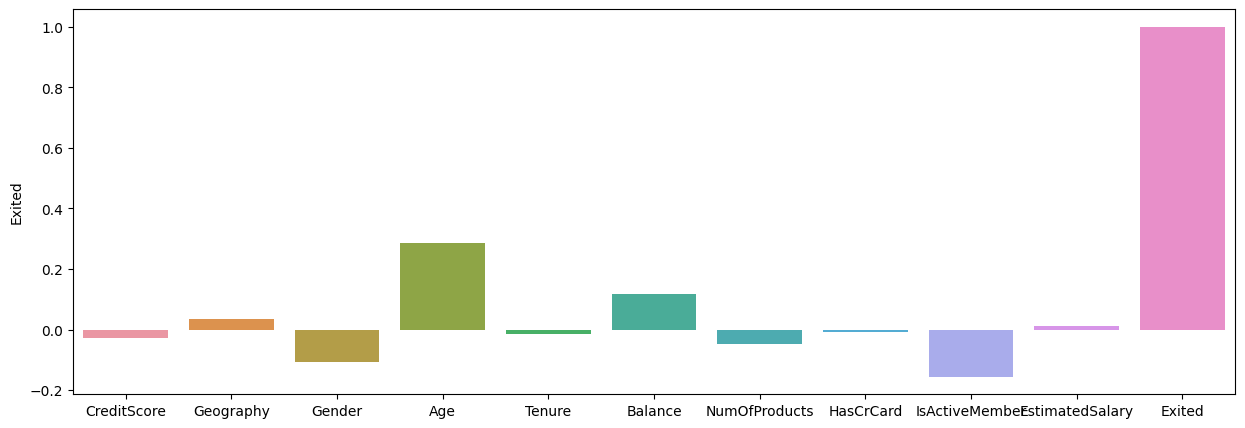

In [105]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_corr_exit,x=df_corr_exit.index,y='Exited')

# important feature using extratreeregressor

In [146]:
# important feature using extratreeregressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [147]:
print(selection.feature_importances_)

[0.12182221 0.04249179 0.0180919  0.24622798 0.10476132 0.12925658
 0.14024208 0.03287291 0.0413442  0.12288903]


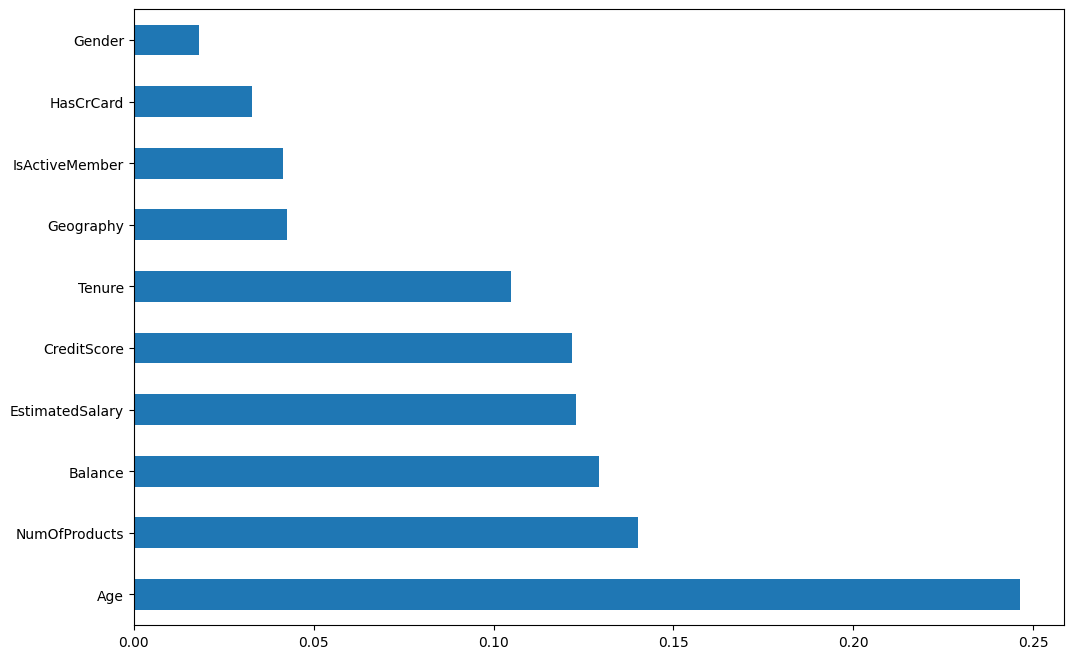

In [148]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Modeling

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.30, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (7000, 10)
Testing Data Shape:  (3000, 10)


In [76]:
#  LogisticRegression
lr = LogisticRegression()
print(lr.fit(X_train , Y_train))

#  DecisionTreeClassifier()
dt = DecisionTreeClassifier()
print(dt.fit(X_train , Y_train))


#Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=100)
print(rf.fit(X_train , Y_train))

#SVM
svm = LinearSVC(random_state=100)
print(svm.fit(X_train , Y_train))

#Naive Bayes
nb = MultinomialNB()
print(nb.fit(X_train , Y_train))
#KNeighborsClassifier
kn=KNeighborsClassifier()
print(kn.fit(X_train , Y_train))

# Initialize the XGBoost classifier
xgb = xgb.XGBClassifier(
    n_estimators=100,  # number of trees (adjust as needed)
    max_depth=3,  # maximum depth of each tree (adjust as needed)
    learning_rate=0.1  # learning rate (adjust as needed)
)

# Train the model
xgb.fit(X_train , Y_train)

LogisticRegression()
DecisionTreeClassifier()
RandomForestClassifier(random_state=100)


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=100)
MultinomialNB()
KNeighborsClassifier()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [38]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_kn = kn.predict(X_test)
y_pred_xgb = xgb.predict(X_test)


# campare All model Accuracy

In [39]:
from sklearn import metrics
print('Accuracy of LogisticRegression',metrics.accuracy_score(Y_test,y_pred_lr))
print('Accuracy of  DecisionTreeClassifier',metrics.accuracy_score(Y_test,y_pred_dt))
print('Accuracy of RandomForestClassifier',metrics.accuracy_score(Y_test,y_pred_rf))
print('Accuracy of LinearSVC',metrics.accuracy_score(Y_test,y_pred_svm))
print('Accuracy of MultinomialNB',metrics.accuracy_score(Y_test,y_pred_nb))
print('Accuracy of KNeighborsClassifier',metrics.accuracy_score(Y_test,y_pred_kn))
print('Accuracy of XGBoost classifier',metrics.accuracy_score(Y_test,y_pred_xgb))

Accuracy of LogisticRegression 0.8006666666666666
Accuracy of  DecisionTreeClassifier 0.7953333333333333
Accuracy of RandomForestClassifier 0.869
Accuracy of LinearSVC 0.8053333333333333
Accuracy of MultinomialNB 0.5393333333333333
Accuracy of KNeighborsClassifier 0.7706666666666667
Accuracy of XGBoost classifier 0.8693333333333333


In [40]:
LogisticRegression=metrics.accuracy_score(Y_test,y_pred_lr)
DecisionTreeClassifier=metrics.accuracy_score(Y_test,y_pred_dt)
RandomForestClassifier=metrics.accuracy_score(Y_test,y_pred_rf)
LinearSVC=metrics.accuracy_score(Y_test,y_pred_svm)
MultinomialNB=metrics.accuracy_score(Y_test,y_pred_nb)
KNeighborsClassifier=metrics.accuracy_score(Y_test,y_pred_kn)
XGBoostclassifier=metrics.accuracy_score(Y_test,y_pred_xgb)

In [41]:
compare_accuracy=pd.DataFrame({'Model':['RF','Dt','SVC','NB','XGB','LG','KN'],'ACC':[RandomForestClassifier,DecisionTreeClassifier, LinearSVC,MultinomialNB,XGBoostclassifier,LogisticRegression,KNeighborsClassifier]})

In [42]:
compare_accuracy

,Model,ACC
0,RF,0.869000
1,Dt,0.795333
2,SVC,0.805333
3,NB,0.539333
4,XGB,0.869333
5,LG,0.800667
6,KN,0.770667


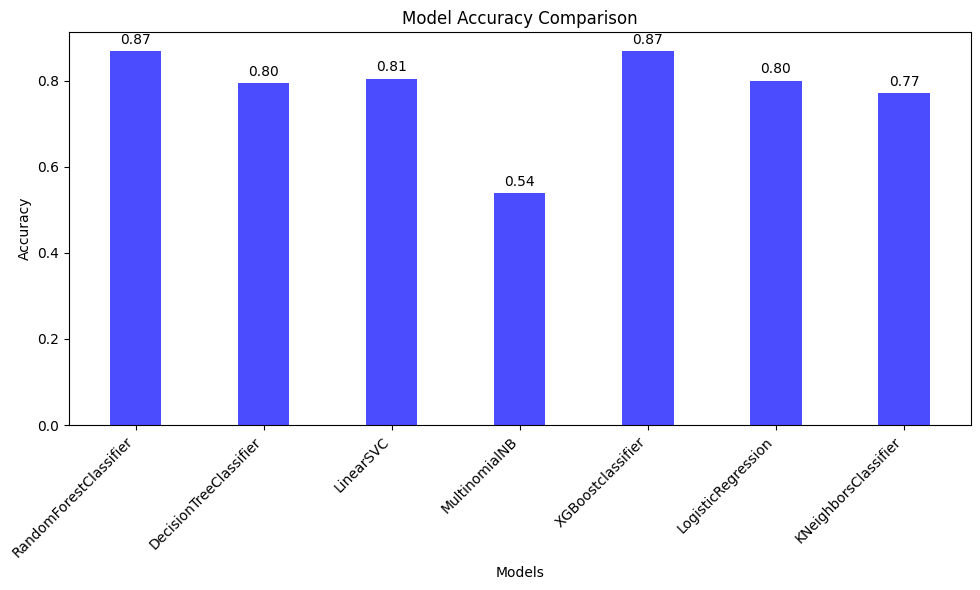

In [43]:

def plot_accuracy(models, accuracies):
    """
    Plot the accuracy of multiple models.

    Parameters:
    - models (list): A list of model names.
    - accuracies (list): A list of accuracy values corresponding to the models.
    """
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Generate evenly spaced x-coordinates for each model
    x = np.arange(len(models))

    # Plot the accuracy values as bars
    ax.bar(x, accuracies, width=0.4, align='center', alpha=0.7, color='b')

    # Set the x-axis labels to be the model names
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right')

    # Set axis labels and title
    ax.set_xlabel('Models')
    ax.set_ylabel('Accuracy')
    ax.set_title('Model Accuracy Comparison')

    # Display the accuracy values on top of the bars
    for i, acc in enumerate(accuracies):
        ax.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
models = ['RandomForestClassifier','DecisionTreeClassifier','LinearSVC','MultinomialNB','XGBoostclassifier','LogisticRegression','KNeighborsClassifier']
accuracies = [RandomForestClassifier,DecisionTreeClassifier, LinearSVC,MultinomialNB,XGBoostclassifier,LogisticRegression,KNeighborsClassifier]

plot_accuracy(models, accuracies)


# campare All precision Accuracy Score

In [44]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [45]:
LR_pc= precision_score(Y_test,y_pred_lr)
Dt_pc= precision_score(Y_test,y_pred_dt)
RF_pc= precision_score(Y_test,y_pred_rf)
SVM_pc= precision_score(Y_test,y_pred_svm)
NB_pc= precision_score(Y_test,y_pred_nb)
KNN_pcr=precision_score(Y_test,y_pred_kn)
xgb_pc=precision_score(Y_test,y_pred_xgb)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
compare_prec=pd.DataFrame({'Model':['LR','Dt','Rf','SVM','NB','KNN','XGB'],'precision':[LR_pc,Dt_pc,RF_pc,SVM_pc,NB_pc,KNN_pcr,xgb_pc]})

In [47]:
compare_prec

,Model,precision
0,LR,0.436364
1,Dt,0.475649
2,Rf,0.785075
3,SVM,0.000000
4,NB,0.222917
5,KNN,0.254717
6,XGB,0.790909


<Axes: xlabel='Model', ylabel='precision'>

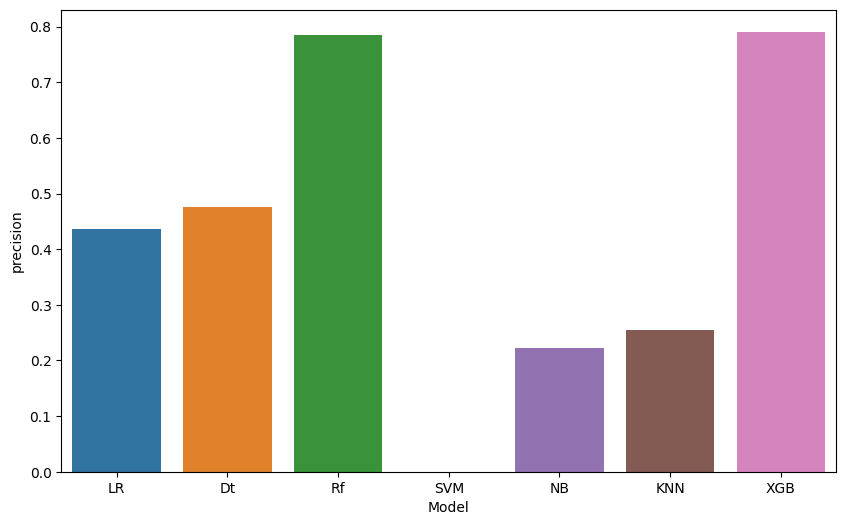

In [48]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
# Equivalent to:
sns.barplot(x = "Model", y = "precision", data = compare_prec)

# campare All Recall Score Accuracy Score

In [50]:
LR_RC= recall_score(Y_test,y_pred_lr)
Dt_RC= recall_score(Y_test,y_pred_dt)
RF_RC= recall_score(Y_test,y_pred_rf)
SVM_RC= recall_score(Y_test,y_pred_svm)
NB_RC= recall_score(Y_test,y_pred_nb)
KNN_RC=recall_score(Y_test,y_pred_kn)
xgb_RC=recall_score(Y_test,y_pred_xgb)

In [51]:
compare_Recall=pd.DataFrame({'Model':['LR','Dt','Rf','SVM','NB','KNN','XGB'],'recall_score':[LR_RC,Dt_RC,RF_RC,SVM_RC,NB_RC,KNN_RC,xgb_RC]})

In [52]:
compare_Recall

,Model,recall_score
0,LR,0.082192
1,Dt,0.501712
2,Rf,0.450342
3,SVM,0.000000
4,NB,0.549658
5,KNN,0.092466
6,XGB,0.446918


<Axes: xlabel='Model', ylabel='recall_score'>

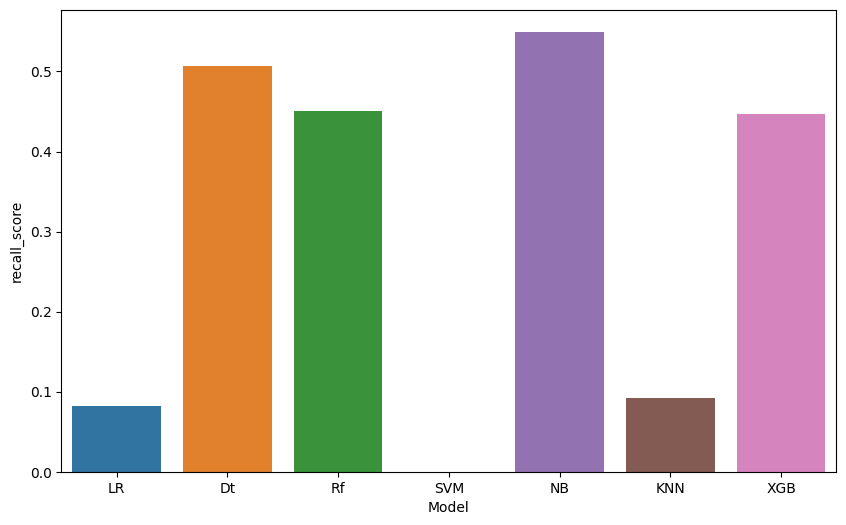

In [182]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
# Equivalent to:
sns.barplot(x = "Model", y = "recall_score", data =compare_Recall )

# campare All F1_score Accuracy Score

In [183]:
LR_f1= f1_score(Y_test,y_pred_lr)
Dt_f1= f1_score(Y_test,y_pred_dt)
RF_f1= f1_score(Y_test,y_pred_rf)
SVM_f1= f1_score(Y_test,y_pred_svm)
NB_f1= f1_score(Y_test,y_pred_nb)
KNN_f1=f1_score(Y_test,y_pred_kn)
xgb_f1=f1_score(Y_test,y_pred_xgb)

In [188]:
compare_f1score=pd.DataFrame({'Model':['LR','Dt','Rf','SVM','NB','KNN','XGB'],'recall_score':[LR_f1,Dt_f1,RF_f1,SVM_f1,NB_f1,KNN_f1,xgb_f1]})

In [199]:
compare_f1score

,Model,recall_score
0,LR,0.138329
1,Dt,0.494983
2,Rf,0.572361
3,SVM,0.000000
4,NB,0.317194
5,KNN,0.135678
6,XGB,0.571116


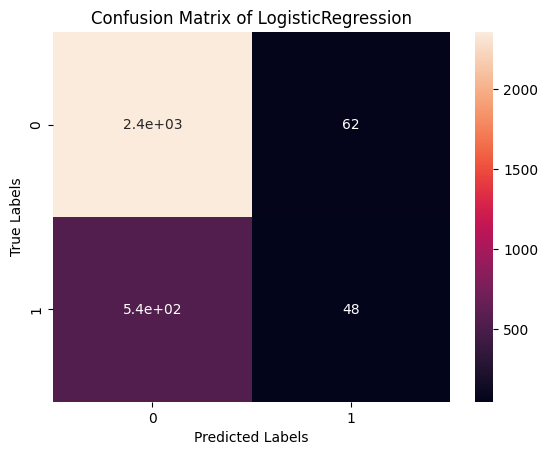

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test ,y_pred_lr)
sns.heatmap(cm , annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of LogisticRegression')
plt.show()

In [53]:
report_lr = classification_report(Y_test, y_pred_lr)
print("Classification report of Logistic Regression (Multi-Class):\n", report_lr)

Classification report of Logistic Regression (Multi-Class):
               precision    recall  f1-score   support

           0       0.81      0.97      0.89      2416
           1       0.44      0.08      0.14       584

    accuracy                           0.80      3000
   macro avg       0.63      0.53      0.51      3000
weighted avg       0.74      0.80      0.74      3000



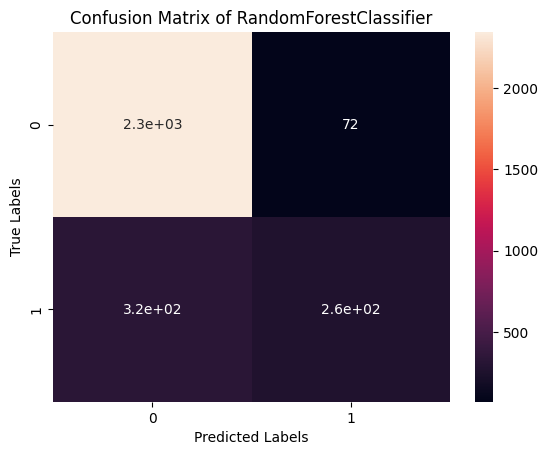

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test ,y_pred_rf)
sns.heatmap(cm , annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of RandomForestClassifier')
plt.show()

In [55]:
report_rf = classification_report(Y_test,y_pred_rf)
print("Classification report of RandomForestClassifie:\n", report_rf)

Classification report of RandomForestClassifie:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.79      0.45      0.57       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000



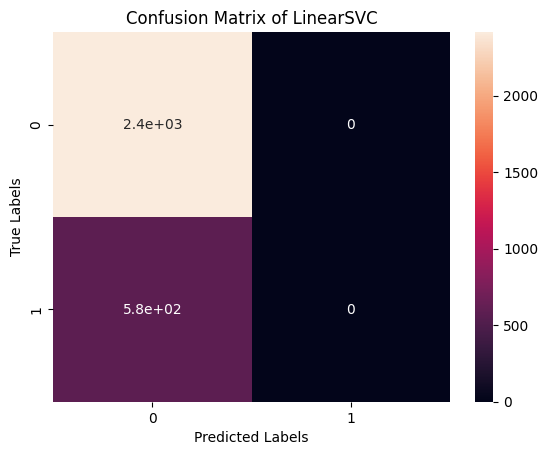

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test ,y_pred_svm)
sns.heatmap(cm , annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of LinearSVC')
plt.show()

In [57]:
report_svm = classification_report(Y_test,y_pred_svm)
print("Classification report of LinearSVC:\n", report_svm)

Classification report of LinearSVC:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.00      0.00      0.00       584

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


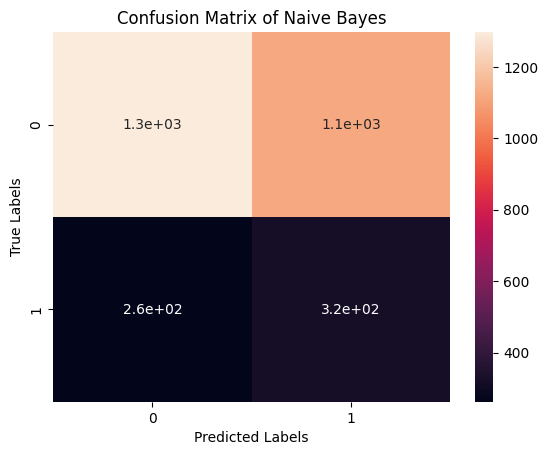

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test ,y_pred_nb)
sns.heatmap(cm , annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Naive Bayes')
plt.show()

In [60]:
report_nb= classification_report(Y_test,y_pred_nb)
print("Classification report of Naive Bayes:\n", report_nb)

Classification report of Naive Bayes:
               precision    recall  f1-score   support

           0       0.83      0.54      0.65      2416
           1       0.22      0.55      0.32       584

    accuracy                           0.54      3000
   macro avg       0.53      0.54      0.48      3000
weighted avg       0.71      0.54      0.59      3000



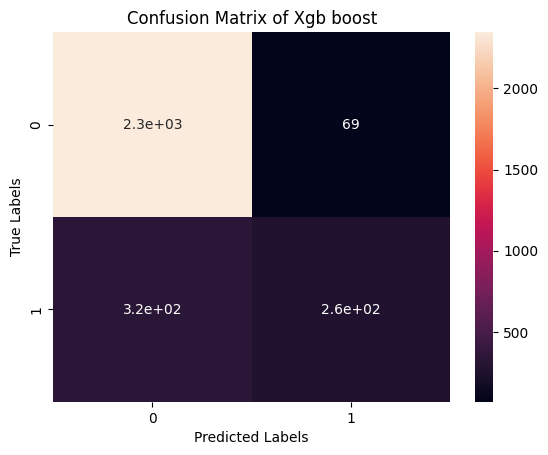

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test ,y_pred_xgb)
sns.heatmap(cm , annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Xgb boost')
plt.show()

In [105]:
report_xgb= classification_report(Y_test,y_pred_xgb)
print("Classification report of xgb:\n", report_xgb)

Classification report of xgb:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.79      0.45      0.57       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000



# Hyperparameter Tuning
1) Choose following method for hyperparameter tuning
2) RandomizedSearchCV --> Fast

GridSearchCV

Assign hyperparameters in form of dictionery

Fit the model

Check best paramters and best score

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [114]:
param_grid={
    'learning_rate':[1,0.5,0.1,0.01],
    'max_depth':[3,5,10,20],
    'n_estimators':[10,50,100]
}

In [121]:
grid = RandomizedSearchCV(XGBClassifier(objective='binary:logistic'), param_grid, verbose=3)


In [122]:
grid .fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.851 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.852 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.859 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.859 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.845 total time=   0.1s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.856 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.855 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.858 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.859 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.848 total time=   0.0s

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   param_distributions={'learning_rate': [1, 0.5, 0.1, 0.01],
                                        'max_depth': [3, 5, 10, 20],
                                        'n_estimators': [10, 50, 100]},
                   verbose=3)

In [123]:
grid.best_params_

{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}

In [131]:
xgb = XGBClassifier(n_estimators= 100, max_depth= 3, learning_rate= 0.1)
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [132]:
# checking accuracy of test dataset
print("testing accuracy is : ", xgb.score( X_test,Y_test )*100)


testing accuracy is :  86.93333333333332


In [134]:
y_pred_xg = xgb.predict(X_test)

In [136]:
report_xgb= classification_report(Y_test,y_pred_xgb)
print("Classification report of xgb:\n", report_xgb)

Classification report of xgb:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.79      0.45      0.57       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000



In [137]:
XGBoostclassifier=metrics.accuracy_score(Y_test,y_pred_xgb)
print(XGBoostclassifier)

0.8693333333333333


In [89]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [139]:


prediction = rf.predict([[502,0,0,42,8,159660.80,3,1,0,113931.57]])
if prediction == 1:
    print("Curn")
else:
    print("Not churn")

Curn


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [140]:
import os
# Change the working directory to a new path
new_directory = "/kaggle/working/"
os.chdir(new_directory)

In [141]:
import pickle

In [142]:
pickle.dump(rf , open('model.pkl' , 'wb'))